## Analisa dalam Memprediksi Pelanggan Bank yang Rentan Berhenti 



.
<h3>Goal of Analysis:</h3>

* Tujuan analisa ini adalah untuk mencari faktor yang mempengaruhi pelanggan bank yang berhenti. Dengan mempertimbangkan semua faktor, akan dipersiapkan model yang akurat dalam memprediksi pelanggan bak yang berhenti. Dengan demikian, diharapkan pihak Bank akan dapat secara cepat mengimplementasikan strategi yang sesuai.


.
<h3>Overview:</h3>

* Dataset berisi berbagai hal berkaitan dengan pelanggan bank, termasuk credit score, geographycal location, gender, age, tenure, account balance, number of products, credit card status, activity status, estimated salary, exited status dan beberapa hal lain. 
* Variabel target adalah ‘Exited’, mengindikasikan apakah customer  telah berhenti atau belum. Variabel lain seperti ‘Complain’, ‘Satisfaction Score’, ‘Point Earned’ dan beberapa lainnya, juga diperhitungkan.




.
<h3>Table of Content:</h3>

1. Import Data
2. Data Understanding and Preprocessing
3. Exploratory Data Analysis
4. Modeling
5. Model Evaluation
6. Insight and Recommendation





.

<a id="1"></a> <br>
## 1. Import Data

##### Dataset:
* https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn


##### Column Description:
1. RowNumber: Sequential number assigned to each row.
2. CustomerId: Unique identifier for each customer.
3. Surname: Customer's surname or last name.
4. CreditScore: Numeric value representing the customer's credit score.
5. Geography: Categorical variable indicating the customer's geographic location.
6. Gender: Categorical variable representing the customer's gender.
7. Age: Numeric value indicating the customer's age.
8. Tenure: Number of years the customer has been associated with the bank.
9. Balance: Numeric value representing the customer's account balance.
10. NumOfProducts: Number of bank products/services used by the customer.
11. HasCrCard: Binary variable indicating if the customer has a credit card (1 for yes, 0 for no).
12. IsActiveMember: Binary variable indicating if the customer is an active bank member (1 for yes, 0 for no).
13. EstimatedSalary: Estimated salary of the customer.
14. Exited: Binary variable indicating if the customer churned (left the bank) (1 for yes, 0 for no).
15. Complain: Binary variable indicating if the customer has lodged a complaint (1 for yes, 0 for no).
16. Satisfaction Score: Customer satisfaction score (if available).
17. Card Type: Type of credit card (if applicable).
18. Point Earned: Points earned by the customer through bank transactions or programs.

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading dataset

df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [3]:
# Check jumlah baris dan kolom

df.shape

(10000, 18)

#### Temuan:
* Terdapat 10000 baris dan 18 kolom

<a name="l2"></a>
## 2. Data Understanding and Preprocessing

In [4]:
# Check apakah semua kolom sudah sesuai tipe datanya

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
# Check untuk missing value

df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# Check untuk unique value

df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [7]:
# Check untuk duplicate

df.duplicated().sum()

0

#### Hasil: 
* Semua kolom sudah sesuai tipe datanya
* Tidak ada missing value
* Tidak ada duplicate

## 3. Exploratory Data Analysis

In [8]:
# Drop kolom yang tidak diingikan.

df = df.drop(columns=(['Surname','RowNumber', 'CustomerId']))

In [9]:
# STATISTICAL SUMMARY
# mengelompokkan kolom sesuai masing-masing tipe data

categoricals = ['Geography','Gender','Card Type']
numericals = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
             'EstimatedSalary','Exited','Complain','Satisfaction Score','Point Earned']

In [10]:
df[numericals].describe().T

count           mean           std     min       25%  \
CreditScore         10000.0     650.528800     96.653299  350.00    584.00   
Age                 10000.0      38.921800     10.487806   18.00     32.00   
Tenure              10000.0       5.012800      2.892174    0.00      3.00   
Balance             10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts       10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard           10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember      10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary     10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited              10000.0       0.203800      0.402842    0.00      0.00   
Complain            10000.0       0.204400      0.403283    0.00      0.00   
Satisfaction Score  10000.0       3.013800      1.405919    1.00      2.00   
Point Earned        10000.0     606.515100    225.924839  119.00    410.00   

                           50%          75%        max  
CreditScore            652.000     718.0000     850.00  
Age                     37.000      44.0000      92.00  
Tenure                   5.000       7.0000      10.00  
Balance              97198.540  127644.2400  250898.09  
NumOfProducts            1.000       2.0000       4.00  
HasCrCard                1.000       1.0000       1.00  
IsActiveMember           1.000       1.0000       1.00  
EstimatedSalary     100193.915  149388.2475  199992.48  
Exited                   0.000       0.0000       1.00  
Complain                 0.000       0.0000       1.00  
Satisfaction Score       3.000       4.0000       5.00  
Point Earned           605.000     801.0000    1000.00

In [11]:
# value counts discrete columns
cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
             'EstimatedSalary','Exited','Complain','Satisfaction Score','Point Earned']
for col in cols:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of CreditScore column
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64 

Value counts of Age column
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64 

Value counts of Tenure column
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64 

Value counts of Balance column
Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64 

Value counts of NumOfProducts column
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64 

Value counts of HasCrCard 

#### Temuan:
1. Rentang Credit Score sebanyak 460 nilai, dengan score terbanyak pada score maksimal di 850 dengan 233 orang.
2. Rentang umur sangat luas, sebanyak 70 angka umur, dengan termuda di 18 tahun dan tertua di 92 tahun.
3. Jumlah customer yang memiliki kartu sebanyak 7055 orang dan yang tidak memiliki kartu sebanyak 2945 orang.
4. Jumlah customer yang aktif sebanyak 5151 orang dan yang tidak aktif sebanyak 4849 orang.
5. Jumlah customer yang tidak keluar sebanyak 7962 orang dan yang keluar sebanyak 2038 orang.
6. Jumlah customer yang tidak complain sebanyak 7956 orang dan yang complain sebanyak 2044 orang.

In [12]:
df[categoricals].describe()

Geography Gender Card Type
count      10000  10000     10000
unique         3      2         4
top       France   Male   DIAMOND
freq        5014   5457      2507

In [13]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Geography column
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Value counts of Gender column
Gender
Male      5457
Female    4543
Name: count, dtype: int64 

Value counts of Card Type column
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64 



#### Temuan:
1. Hanya terdapat 3 negara dalam kolom Geography.
2. Perbedaan jumlah Male dan Female tidak terlalu signifikan, yaitu Male 5457 orang dan Female 4543 orang.
3. Terdapat 4 jenis tipe Card, yaitu Diamond, Gold, Silver dan Platinum.

## Univariate Analysis

### BOXPLOT

C:\Users\USER\AppData\Local\Temp\ipykernel_10708\3055492624.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\3055492624.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\3055492624.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\3055492624.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\3055492624.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\3055492624.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\

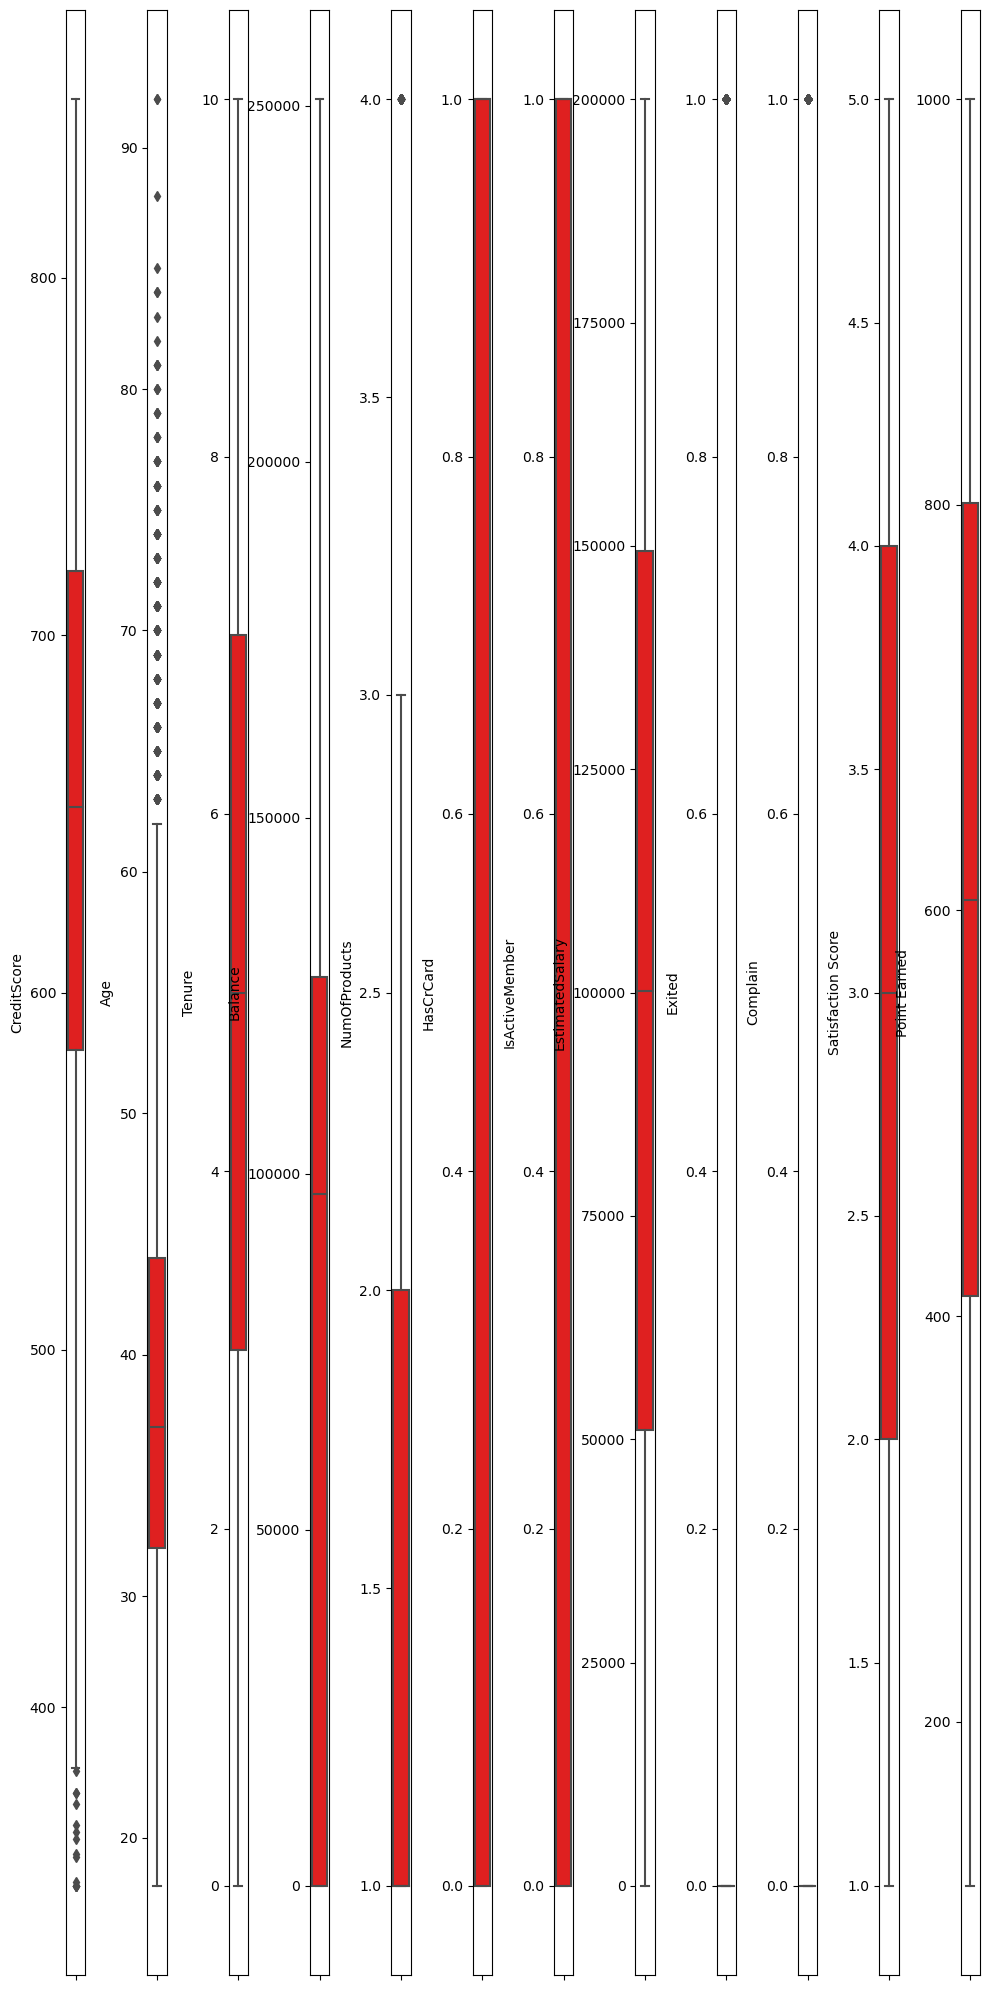

In [14]:
plt.figure(figsize=(10,20))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Diputuskan untuk menganalisa outlier dari Age. 

In [15]:
# Mencari outlier

outlier = df['Age'].min()

df[df['Age'] == outlier]

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
746           844    France    Male   18       2  160980.03              1   
1619          656    France    Male   18      10  151762.74              1   
1678          570    France  Female   18       4   82767.42              1   
2021          716   Germany  Female   18       3  128743.80              1   
2136          727    France    Male   18       4  133550.67              1   
2141          674    France    Male   18       7       0.00              2   
3330          738    France    Male   18       4       0.00              2   
3512          806     Spain    Male   18       3       0.00              2   
3517          771     Spain    Male   18       1       0.00              2   
3686          706    France    Male   18       2  176139.50              2   
4556          681    France  Female   18       1   98894.39              1   
4716          646    France    Male   18      10       0.00              2   
7334          616    France    Male   18       6       0.00              2   
7722          684   Germany    Male   18       9   90544.00              1   
8522          644     Spain    Male   18       8       0.00              2   
9029          594   Germany    Male   18       1  132694.73              1   
9501          835   Germany    Male   18       2  142872.36              1   
9520          727   Germany  Female   18       2   93816.70              2   
9526          642   Germany    Male   18       5  111183.53              2   
9572          644     Spain    Male   18       7       0.00              1   
9782          509    France    Male   18       7  102983.91              1   
9932          677     Spain    Male   18       8  134796.87              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
746           0               0        145936.28       0         0   
1619          0               1        127014.32       0         0   
1678          1               0         71811.90       0         0   
2021          0               0        197322.13       0         0   
2136          1               1         46941.41       0         0   
2141          1               1         55753.12       1         1   
3330          1               1         47799.15       0         0   
3512          1               1         86994.54       0         0   
3517          0               0         41542.95       0         0   
3686          1               0        129654.22       0         0   
4556          1               1          9596.40       0         0   
4716          0               1         52795.15       0         0   
7334          1               1         27308.58       0         0   
7722          0               1          4777.23       0         0   
8522          1               0         59172.42       0         0   
9029          1               0        167689.56       0         0   
9501          1               1        117632.63       0         0   
9520          1               0        126172.11       0         0   
9526          0               1         10063.75       0         0   
9572          0               1         59645.24       1         1   
9782          1               0        171770.58       0         0   
9932          1               1        114858.90       0         0   

      Satisfaction Score Card Type  Point Earned  
746                    5   DIAMOND           821  
1619                   2      GOLD           778  
1678                   5    SILVER           507  
2021                   5      GOLD           243  
2136                   4  PLATINUM           864  
2141                   5   DIAMOND           603  
3330                   5  PLATINUM           739  
3512                   2      GOLD           768  
3517                   1      GOLD           371  
3686                   3  PLATINUM           405  
4556                   1      GOLD     

In [16]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

#### Temuan: 
Outlier ada pada usia 18. Diputuskan untuk dibiarkan karena dianggap tidak berpengaruh.

### KDE Plot

C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_10708\330272346.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\i

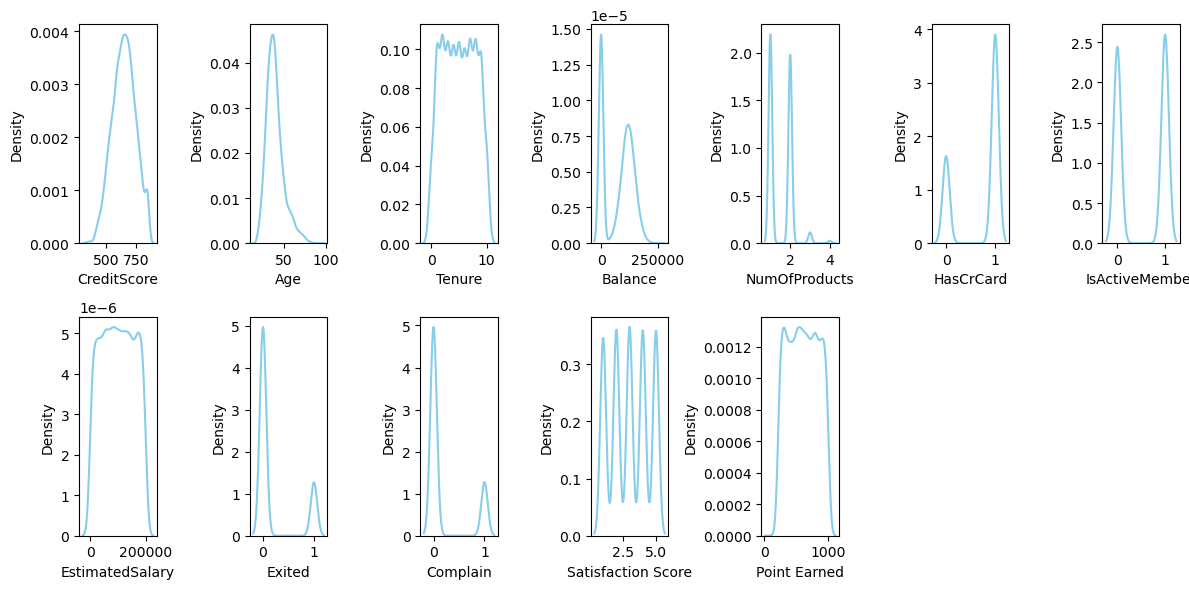

In [17]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

#### Temuan:
1. Pada 'CreditScore', bentuk sebaran adalah normal skew.
2. Pada 'Age', bentuk sebaran berupa positif skew.
3. Untuk 'Tenure', bentuk sebaran berupa normal skew.
4. Untuk 'Balance', bentuk sebaran berupa positif skew, ada penurunan ditengah namun naik kembali dan menurun lagi di akhir plot.
5. Pada 'NumOfProducts', bentuk distribusi untuk masing-masing '1', '2', '3', dan '4' adalah normal skew. Namun nilai '1' dan '2' sangat tinggi dibandingkan dengan '3' dan '4'.
6. Untuk 'HasCrCard', bentuk distribusi untuk '0' (tidak memiliki kartu) sangat berbeda secara signifikan/kontras dengan bentuk distribusi '1' (memiliki kartu). 
7. Pada 'IsActiveMember', sebaran distribusi untuk '0' dan '1', relatif sama.
8. Pada 'EstimatedSalary', secara umum bentuk sebaran adalah normal skew.
9. Pada 'Existed', sebaran distribusi untuk '0' sangat tinggi dan sangat berbeda dengan sebaran distribusi untuk '1'.
10. Untuk 'Complain', sebaran distribusi untuk '0' sangat tinggi dan sangat berbeda dengan sebaran distribusi untuk '1'.
11. Pada 'Satisfaction Score', bentuk distribusi secara umum berbentuk normal skew, walaupun terdapat beberapa kali kenaikan dan penurunan.
12. Untuk 'Point Earned', sebaran distribusi secara umum berbentuk normal skew.

### Bivariate Analysis

<Axes: xlabel='Exited', ylabel='count'>

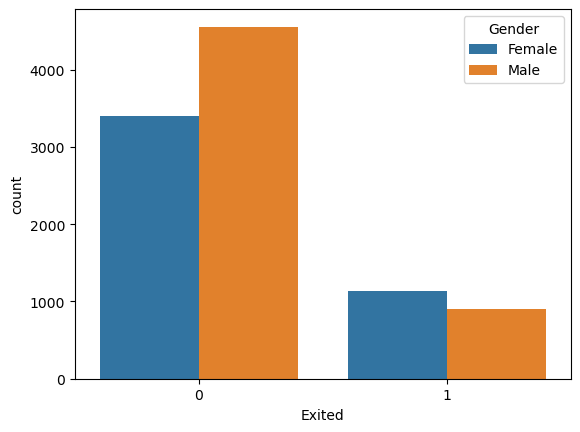

In [18]:
# 'Exited' berdasarkan 'Gender'
sns.countplot(data=df,
            x='Exited',
            hue='Gender'   )

#### Temuan:
* Perbedaan jumlah Female jauh lebih tinggi dari Male untuk customer yang '0' (tidak keluar).
* Jumlah Male sedikit lebih banyak dari Female untuk customer yang '1' (keluar).
* Secara umum, jumlah customer yang keluar adalah 20% dari total customer.

### Heat Map

<Axes: >

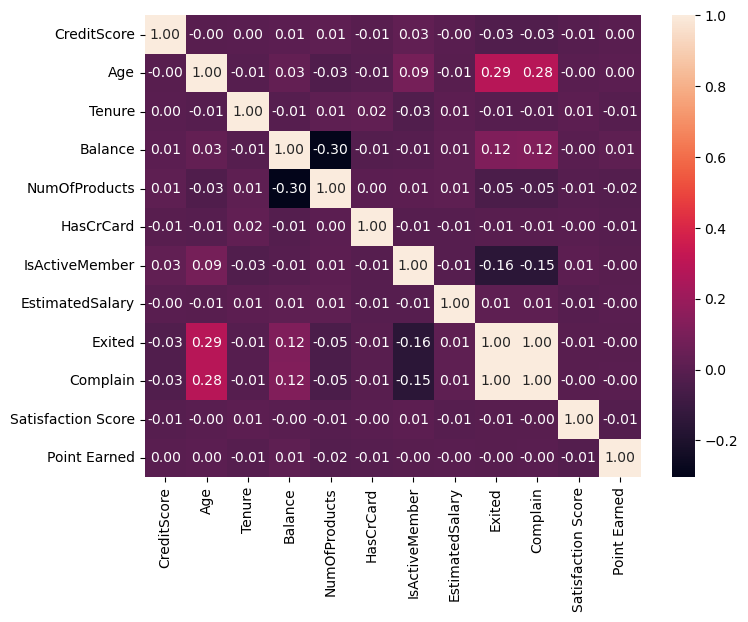

In [19]:
# correlation heatmap

plt.figure(figsize=(8,6))
correlation = df[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

#### Hasil:
* Warna cerah/terang pada heatmap menggambarkan hubungan yang kuat. Dengan demikian; 'Age', 'Exited' dan 'Complain' memiliki hubungan korelasi yang sangat kuat.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


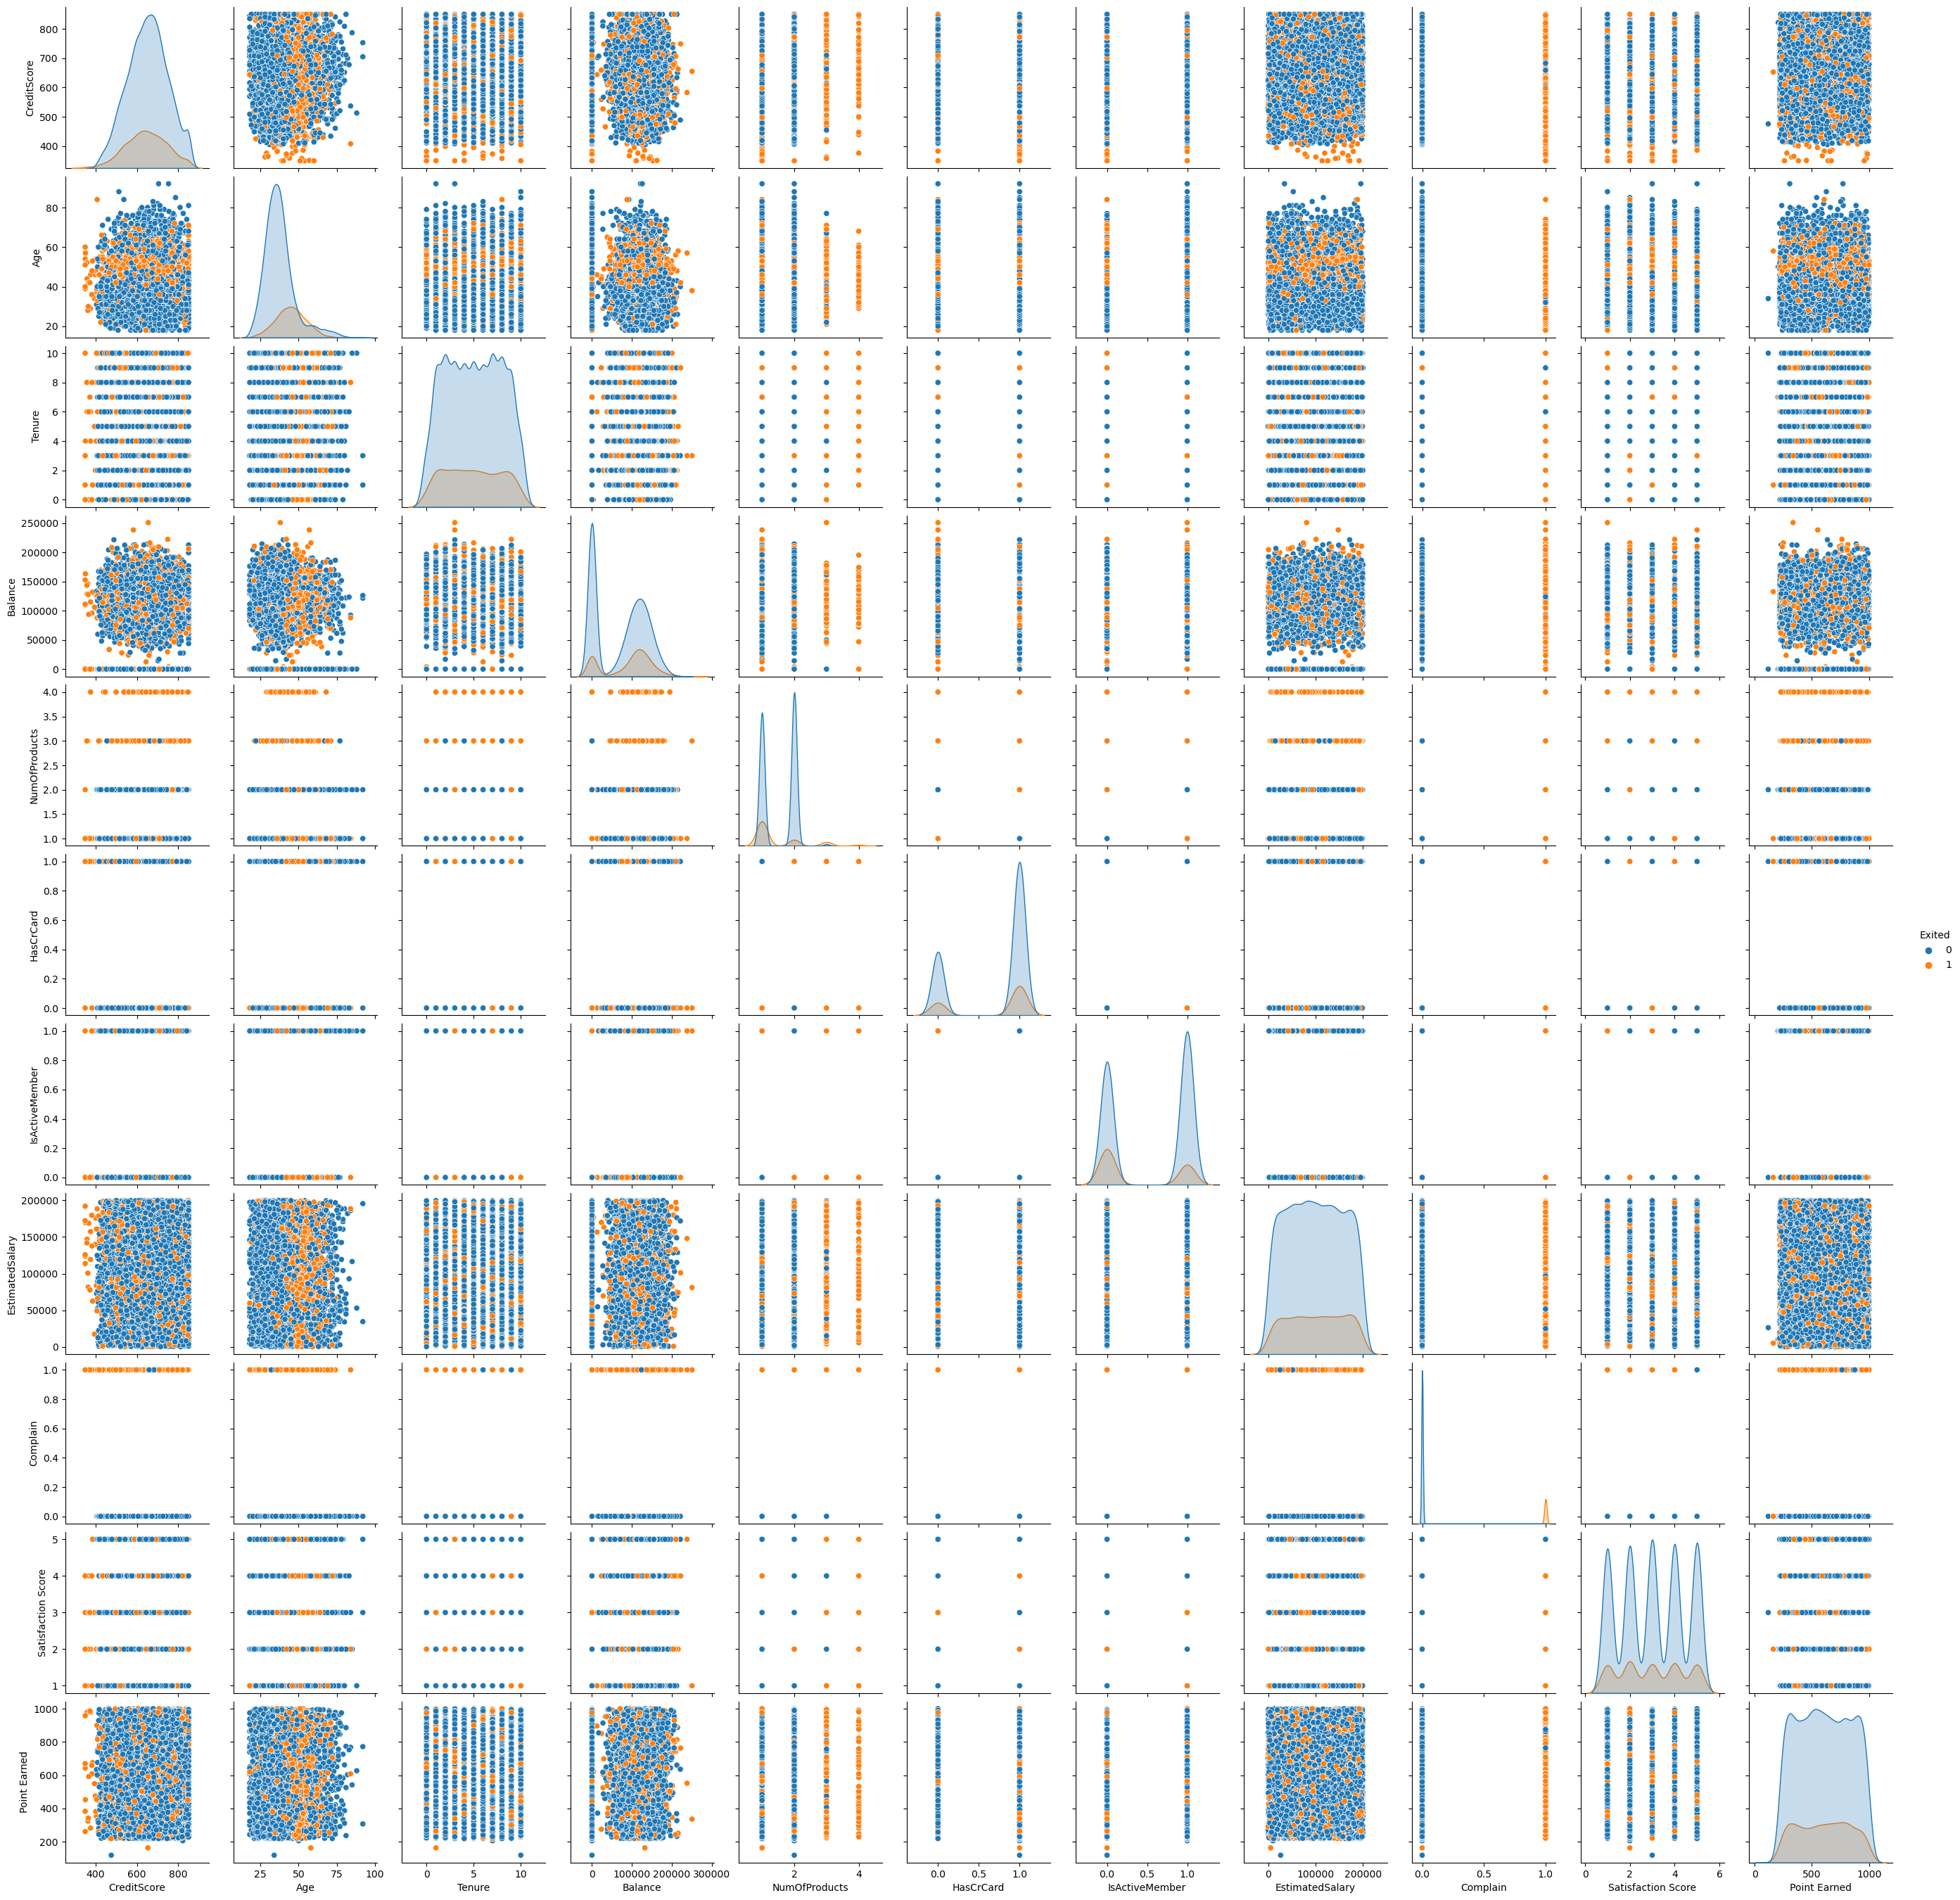

In [20]:
# pairplot of the data
sns.pairplot(df, hue='Exited')

#### Temuan, terlihat pada pairplot:
1. 'CreditScore', Non Exited memiliki nilai CreditScore yang sangat tinggi sebesar 850, dengan bentuk skew normal, dan memperlihatkan sebaran Non Exited yang lebih banyak dibanding dengan Exited.
2. 'Age', Non Exited mempunyai nilai maksimum umur yang lebih tinggi yaitu 92 tahun dibanding Exited 30 tahun, dengan bentuk skew positif dan sebaran distribusi Non Exited lebih banyak dibanding dengan Exited.
3. 'Tenure', Non Exited memiliki nilai Tenure yang tinggi yaitu 10 dibandingkan hanya 2 untuk Exited, dengan bentuk skew cenderung normal, dan sebaran Non Exited lebih banyak dibanding dengan Exited.
4. 'Balance', Non Exited memiliki nilai Balance yang tinggi yaitu 250.000 dibanding hanya 50.000 untuk Exited, dengan bentuk skew normal dengan pengulangan 2 kali, sebaran Non Exited lebih banyak dibanding dengan Exited walaupun rapat.
5. 'NumOfProducts', Non Exited memiliki nilai 4 pada jenis produk dibandingkan Exited dengan nilai 1.5, berbentuk positive skew, dan sebaran Non Exited lebih banyak dibanding dengan Exited.
6. 'HasCrCard', baik customer yang punya Card dan tidak punya - Non Exited memiliki angka yang lebih tinggi dibanding dengan Exited, masing-masing berbentuk positif skew, dengan sebaran Non Exited lebih banyak dibanding dengan Exited.
7. 'IsActiveMember', baik customer yang Aktif dan Tidak - Non Exited memiliki angka yang lebih tinggi dibanding dengan Exited, berbentuk skew positif untuk masing-masing kelompok, serta sebaran Non Exited lebih banyak dibanding dengan Exited.
8. 'EstimatedSalary', Non Exited memiliki nilai EstimatedSalari tinggi yaitu 199.999 dibanding Exited sebesar 50.000, dengan bentuk positif skew, dan memperlihatkan sebaran Non Exited lebih banyak dibanding dengan Exited.
9. 'Complain', Non Exited sangat banyak dalam mengajukan complain, sedangkan Exited yang mengajukan complain angkanya sangat rendah, tergambar disini bahwa customer yang complain belum tentu akan berhenti dan customer yang berhenti belum tentu mengajukan complain.
10. 'Satisfaction Score', Non Exited memiliki angka yang jauh lebih tinggi dibanding Exited dalam tiap nilai kepuasan, dengan bentuk normal skew untuk tiap SatisfactionScore, menggambarkan sebaran Non Exited lebih banyak dibanding dengan Exited.
11. 'Point Earned', Non Exited memiliki nilai maksimal Point tinggi di 1000 dibandingkan dengan nilai maksimal Point untuk Exited di 400, memiliki skew normal secara umum, dan memperlihatkan sebaran Non Exited lebih banyak dibanding dengan Exited.

Secara keseluruhan, pada semua faktor, Non Exited **lebih banyak** dibanding Exited.

.

## DEEP DIVE EXPLORATION

Hal yang akan dicari tahu:
1. Jumlah total customer keluar (Exited) dan mengajukan 'Complain'.
2. Jumlah customer yang keluar (Exited) berdasarkan 'Geography' dan 'Gender'.
3. Jumlah customer yang keluar (Exited) berdasarkan 'HasCrCard' dan 'Gender'.
4. Nilai rata-rata, median, maksimum, dan minimum dari kolom CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.
5. Distribusi customer yang keluar.
6. Distribusi customer berdasarkan 'Satisfaction Score'.
7. Rata-rata 'Tenure' dari customer yang keluar dan customer yang masih aktif.
8. Perbandingan jumlah customer yang complain berdasarkan 'Exited' dan 'Gender'.
9. Distribusi umur customer.


### 1. Jumlah total customer yang keluar (Exited) dan mengajukan 'Complain'.

In [21]:
# Melakukan filter terhadap customer keluar

df1=df[(df['Exited']==1)]
df1

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
2             502    France  Female   42       8  159660.80              3   
5             645     Spain    Male   44       8  113755.78              2   
7             376   Germany  Female   29       4  115046.74              4   
16            653   Germany    Male   58       1  132602.88              1   
...           ...       ...     ...  ...     ...        ...            ...   
9981          498   Germany    Male   42       3  152039.70              1   
9982          655   Germany  Female   46       7  137145.12              1   
9991          597    France  Female   53       4   88381.21              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
2             1               0        113931.57       1         1   
5             1               0        149756.71       1         1   
7             1               0        119346.88       1         1   
16            1               0          5097.67       1         0   
...         ...             ...              ...     ...       ...   
9981          1               1         53445.17       1         1   
9982          1               0        115146.40       1         1   
9991          1               0         69384.71       1         1   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
2                      3   DIAMOND           377  
5                      5   DIAMOND           484  
7                      2   DIAMOND           282  
16                     2    SILVER           163  
...                  ...       ...           ...  
9981                   3      GOLD           790  
9982                   4      GOLD           591  
9991                   3      GOLD           369  
9997                   3    SILVER           564  
9998                   2      GOLD           339  

[2038 rows x 15 columns]

In [22]:
# Melakukan groupby untuk melihat customer keluar yang mengajukan complain

df1.groupby(['Complain']).agg({"Exited":["count"]})  

Exited
          count
Complain       
0             4
1          2034

#### Temuan:
* Dari 2038 orang customer keluar, terdapat 2034 orang yang mengajukan complain.

### 2. Jumlah customer yang keluar (Exited) berdasarkan 'Geography' dan 'Gender'.

In [23]:
# Melakukan filter terhadap customer 'Exited'

df1=df[(df['Exited']==1)]
df1

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
2             502    France  Female   42       8  159660.80              3   
5             645     Spain    Male   44       8  113755.78              2   
7             376   Germany  Female   29       4  115046.74              4   
16            653   Germany    Male   58       1  132602.88              1   
...           ...       ...     ...  ...     ...        ...            ...   
9981          498   Germany    Male   42       3  152039.70              1   
9982          655   Germany  Female   46       7  137145.12              1   
9991          597    France  Female   53       4   88381.21              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
2             1               0        113931.57       1         1   
5             1               0        149756.71       1         1   
7             1               0        119346.88       1         1   
16            1               0          5097.67       1         0   
...         ...             ...              ...     ...       ...   
9981          1               1         53445.17       1         1   
9982          1               0        115146.40       1         1   
9991          1               0         69384.71       1         1   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
2                      3   DIAMOND           377  
5                      5   DIAMOND           484  
7                      2   DIAMOND           282  
16                     2    SILVER           163  
...                  ...       ...           ...  
9981                   3      GOLD           790  
9982                   4      GOLD           591  
9991                   3      GOLD           369  
9997                   3    SILVER           564  
9998                   2      GOLD           339  

[2038 rows x 15 columns]

In [24]:
# Melakukan groupby untuk melihat customer 'Exited' berdasarkan Geography dan Gender

df1.groupby(["Geography",'Gender']).agg({"Exited":["count"]})  

Exited
                  count
Geography Gender       
France    Female    460
          Male      351
Germany   Female    448
          Male      366
Spain     Female    231
          Male      182

#### Temuan Deep Dive sehubungan dengan tujuan analisa: Dari 2038 orang customer yang keluar;
1. France; Female 460 dan Male 351, dengan total 811 orang.
2. Germany; Female 448 dan Male 366, dengan total 814 orang.
3. Spain; Female 231 dan Male 182, dengan total 413 orang.

### 3. Jumlah customer yang keluar (Exited) berdasarkan 'HasCrCard' dan 'Gender'.

In [25]:
# Melakukan groupby untuk melihat customer 'Exited' berdasarkan HasCrCard dan Gender

df1.groupby(["HasCrCard",'Gender']).agg({"Exited":["count"]})  

Exited
                  count
HasCrCard Gender       
0         Female    344
          Male      269
1         Female    795
          Male      630

#### Temuan; Dari 2038 orang customer yang keluar,
1. Tidak memiliki Credit Card; Female 344 dan Male 269, dengan total 613 orang.
2. Memiliki Credit Card; Female 795 dan 630, dengan total 1425 orang.

### 4. Nilai rata-rata, median, maksimum, dan minimum dari kolom CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.

In [26]:
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

#### Hasil:
* Masing-masing nilai rata-rata, median, maksimum dan minimum telah tertera untuk masing-masing faktor.

### 5. Distribusi customer yang keluar.

<Axes: xlabel='Exited', ylabel='count'>

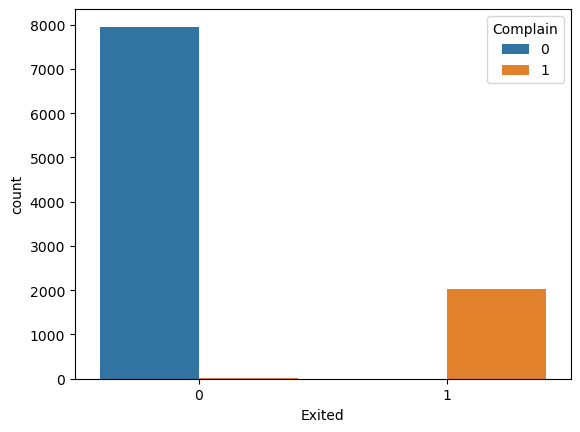

In [27]:
# mencari pengaruh distribusi customer keluar berdasarkan complain

sns.countplot(data=df,
            x='Exited',
            hue='Complain'   )

#### Temuan;  Sebaran distribusi untuk complain:
1. Untuk customer yang tidak keluar: sangat sedikit customer yang complain namun tidak keluar (hanya terlihat garis orange tipis). Sedangkan sebagian besar customer (hampir mencapai 8000) tidak mengajukan complain.
2. Untuk customer yang keluar: seluruh customer keluar adalah customer yang mengajukan complain (kurang lebih sebanyak 2000)

### 6. Distribusi customer berdasarkan 'Satisfaction Score'.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


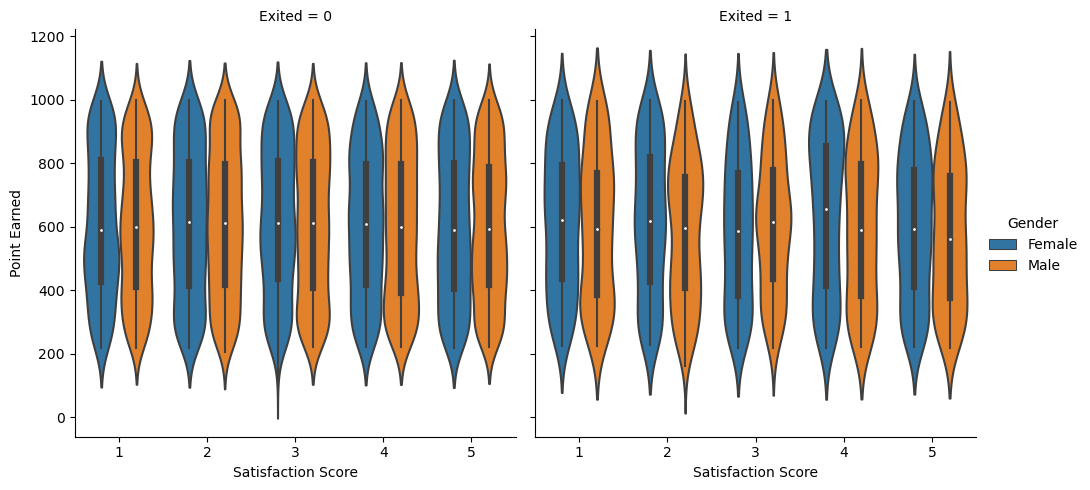

In [28]:
sns.catplot(x="Satisfaction Score", y="Point Earned", hue="Gender", col='Exited', kind='violin', data=df)

#### Temuan; Sebaran distribusi menggunakan violin:
1. Baik Customer yang Exited dan Tidak, hampir sama penyebaran distribusi berdasarkan Satisfaction Score. 
2. Demikian juga dengan Gender, sebaran distribusi berdasarkan Satisfaction Score terlihat sama antara Female dan Male.
3. Satisfaction Score tidak mempengaruhi keputusan customer untuk berhenti.

### 7. Rata-rata 'Tenure' dari customer yang keluar dan customer yang masih aktif.

In [29]:
# rata-rata 'Tenure' untuk customer yang keluar:

exited = df[df['Exited'] == 1]['Tenure'].mean()


# rata-rata 'Tenure' untuk customer yang masih aktif:

active = df[df['IsActiveMember'] == 1]['Tenure'].mean()


print("Rata-rata 'Tenure' untuk customer yang keluar:", exited)
print("Rata-rata 'Tenure' untuk customer yang masih aktif:", active)

Rata-rata 'Tenure' untuk customer yang keluar: 4.934739941118744
Rata-rata 'Tenure' untuk customer yang masih aktif: 4.933216851096875


#### Temuan:
* Rata-rata 'Tenure' untuk customer yang aktif dan keluar menghasilkan nilai yang sama, yaitu 5.

### 8. Perbandingan jumlah customer yang complain berdasarkan 'Exited' dan 'Gender'.

In [30]:
# Filter terhadap customer yang mengajukan complain

df4=df[(df['Complain']==1)]
df4

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
5             645     Spain    Male   44       8  113755.78              2   
7             376   Germany  Female   29       4  115046.74              4   
...           ...       ...     ...  ...     ...        ...            ...   
9984          602   Germany    Male   35       7   90602.42              2   
9985          659    France    Male   36       6  123841.49              2   
9991          597    France  Female   53       4   88381.21              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
5             1               0        149756.71       1         1   
7             1               0        119346.88       1         1   
...         ...             ...              ...     ...       ...   
9984          1               1         51695.41       0         1   
9985          1               0         96833.00       0         1   
9991          1               0         69384.71       1         1   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
1                      3   DIAMOND           456  
2                      3   DIAMOND           377  
5                      5   DIAMOND           484  
7                      2   DIAMOND           282  
...                  ...       ...           ...  
9984                   3      GOLD           764  
9985                   5  PLATINUM           875  
9991                   3      GOLD           369  
9997                   3    SILVER           564  
9998                   2      GOLD           339  

[2044 rows x 15 columns]

In [31]:
# rata-rata customer yang complain berdasarkan Exited dan Gender

df4.groupby(["Exited",'Gender']).agg({"Complain":["count"]})  


Complain
                 count
Exited Gender         
0      Female        5
       Male          5
1      Female     1137
       Male        897

#### Temuan:
1. Complain tapi tidak keluar; Female 5 dan Male 5, dengan total 10 orang.
2. Complain dan keluar; Female 1137 dan Male 897, dengan total 2034 orang.
* Baik customer yang keluar maupun tidak, terlihat bahwa yang banyak mengajukan complain adalah wanita, sebanyak 1142 orang :)

### 9. Distribusi umur customer.

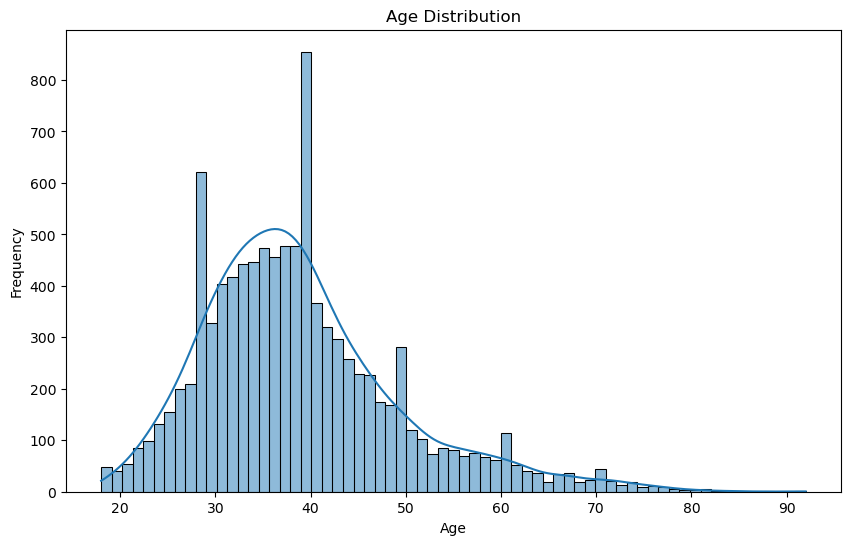

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Temuan:
1. Customer terbanyak di rentang usia 30 s/d 45 tahun.
2. Customer terbanyak pada usia 29 tahun (600 orang) dan 40 tahun (850 orang).
3. Bentuk distribusi positif skew, dengan sebaran ujung yang melandai diusia 92 tahun sabagai custumer yang paling tua.

## 4. Initial Conclusion

* Dari 10000 orang customer, sejumlah 2038 orang keluar (20%).
* Dari 2038 orang yang keluar, sejumlah 2034 orang mengajukan complain.
* Dari 2034 orang customer yang keluar dan complain, sejumlah 1142 orang adalah Female.

## 5. Modeling

### Feature Engineering

In [33]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0             1               1        101348.88       1         1   
1             0               1        112542.58       0         1   
2             1               0        113931.57       1         1   
3             0               0         93826.63       0         0   
4             1               1         79084.10       0         0   
...         ...             ...              ...     ...       ...   
9995          1               0         96270.64       0         0   
9996          1               1        101699.77       0         0   
9997          0               1         42085.58       1         1   
9998          1               0         92888.52       1         1   
9999          1               0         38190.78       0         0   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
1                      3   DIAMOND           456  
2                      3   DIAMOND           377  
3                      5      GOLD           350  
4                      5      GOLD           425  
...                  ...       ...           ...  
9995                   1   DIAMOND           300  
9996                   5  PLATINUM           771  
9997                   3    SILVER           564  
9998                   2      GOLD           339  
9999                   3   DIAMOND           911  

[10000 rows x 15 columns]

In [34]:
# Mengubah kategorikal dari Gender menjadi numerik

df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [35]:
df.describe().T

count           mean           std     min       25%  \
CreditScore         10000.0     650.528800     96.653299  350.00    584.00   
Gender              10000.0       0.545700      0.497932    0.00      0.00   
Age                 10000.0      38.921800     10.487806   18.00     32.00   
Tenure              10000.0       5.012800      2.892174    0.00      3.00   
Balance             10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts       10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard           10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember      10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary     10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited              10000.0       0.203800      0.402842    0.00      0.00   
Complain            10000.0       0.204400      0.403283    0.00      0.00   
Satisfaction Score  10000.0       3.013800      1.405919    1.00      2.00   
Point Earned        10000.0     606.515100    225.924839  119.00    410.00   

                           50%          75%        max  
CreditScore            652.000     718.0000     850.00  
Gender                   1.000       1.0000       1.00  
Age                     37.000      44.0000      92.00  
Tenure                   5.000       7.0000      10.00  
Balance              97198.540  127644.2400  250898.09  
NumOfProducts            1.000       2.0000       4.00  
HasCrCard                1.000       1.0000       1.00  
IsActiveMember           1.000       1.0000       1.00  
EstimatedSalary     100193.915  149388.2475  199992.48  
Exited                   0.000       0.0000       1.00  
Complain                 0.000       0.0000       1.00  
Satisfaction Score       3.000       4.0000       5.00  
Point Earned           605.000     801.0000    1000.00

In [36]:
# Menetapkan feature dan target dari model

X = df[['Age','Gender','IsActiveMember','Balance','NumOfProducts','Complain','HasCrCard','Satisfaction Score']]
y = df['Exited']

In [37]:
# data splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

In [38]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,precision_score, recall_score,roc_curve,roc_auc_score


# Modeling 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn import svm,tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split as tts
from sklearn import model_selection

In [39]:
models = []
models.append(("Logistic Regression",LogisticRegression(solver="liblinear",random_state=42)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("SVM",SVC(gamma='auto',)))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree Classifier",DecisionTreeClassifier()))
models.append(("Gausian NB",GaussianNB()))

In [41]:
recall_results = []
precision_results = []
auc_results = []
f1_score = []
names = []
col = ['Algoritm','ROC_AUC_Mean','ROC_AUC_Std',"Recall_Mean","Recall_Std","Precision_Mean","Precision_Std","F1_score_Mean","F1_score_Std"]

df_results = pd.DataFrame(columns=col)

i = 0

c = list(set(X_train.columns))

for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_recall_results = model_selection.cross_val_score(model,X_train[c],y_train,cv=kfold,scoring="recall")

    cv_precision_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                        cv=kfold,scoring="precision")

    cv_auc_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="roc_auc")

    cv_f1_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="f1")
    recall_results.append(cv_recall_results)
    precision_results.append(cv_precision_results)
    auc_results.append(cv_auc_results)
    f1_score.append(cv_f1_results)
    names.append(name)

    df_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_recall_results.mean()*100,2),
                        round(cv_recall_results.std()*100,2),
                        round(cv_precision_results.mean()*100,2),
                        round(cv_precision_results.std()*100,2),
                        round(cv_f1_results.mean()*100,2),
                        round(cv_f1_results.std()*100,2)]
    i += 1
# df_results.sort_values("ROC_AUC_Mean",ascending=False)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
df_results.sort_values("F1_score_Mean",ascending=False)

Algoritm  ROC_AUC_Mean  ROC_AUC_Std  Recall_Mean  \
1             Random Forest         99.90         0.08        99.75   
4  Decision Tree Classifier         99.29         0.41        98.71   
2                       SVM         79.28         0.36        23.16   
3                       KNN         69.44         1.20        21.90   
5                Gausian NB         80.76         0.11         9.13   
0       Logistic Regression         30.19         1.17         0.00   

   Recall_Std  Precision_Mean  Precision_Std  F1_score_Mean  F1_score_Std  
1        0.09           99.56           0.24          99.66          0.17  
4        0.79           99.44           0.27          99.07          0.46  
2        0.75           99.73           0.38          37.58          1.00  
3        1.85           49.22           2.19          30.28          2.06  
5        0.75           46.92           7.96          15.24          1.35  
0        0.00            0.00           0.00           0.00          0.00

Berdasarkan data yang diberikan, kita memiliki hasil evaluasi kinerja beberapa algoritma klasifikasi menggunakan beberapa metrik evaluasi utama. Berikut adalah interpretasi dari data tersebut:

1. **Random Forest**: Algoritma Random Forest memiliki kinerja yang paling tinggi di antara semua algoritma yang dievaluasi. Ini ditunjukkan dengan nilai ROC AUC_Mean sebesar 99.92, yang menandakan bahwa model ini memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif. Selain itu, F1-score_Mean yang mencapai 99.66 menunjukkan bahwa model ini mencapai keseimbangan yang baik antara recall dan precision.

2. **Decision Tree Classifier**: Algoritma Decision Tree Classifier memiliki kinerja yang cukup baik dengan ROC AUC_Mean sebesar 99.29. Ini menunjukkan bahwa model ini memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Namun, penting untuk dicatat bahwa tidak hanya ROC AUC_Mean yang penting, tetapi juga metrik lainnya seperti recall, precision, dan F1-score.

3. **Gaussian NB**: Algoritma Gaussian NB memiliki kinerja yang cukup baik dengan nilai ROC AUC_Mean sebesar 80.76. Meskipun di bawah Random Forest dan Decision Tree Classifier, Gaussian NB masih menunjukkan kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Namun, perlu diperhatikan bahwa nilai-nilai lain seperti recall, precision, dan F1-score memiliki variasi yang cukup signifikan (ditunjukkan oleh Standar Deviasi yang lebih tinggi), yang mungkin menunjukkan bahwa model ini tidak konsisten dalam kinerjanya.

4. **SVM dan KNN**: Algoritma SVM dan KNN  memiliki ROC AUC_Mean yang sebenarnya cukup baik yaitu sebesar 79.28 dan 69.44. Namun, SVM dan KNN juga menunjukkan variasi yang cukup signifikan dalam beberapa metrik evaluasi, yang menunjukkan bahwa kinerjanya mungkin tidak konsisten dari lipatan ke lipatan.

5. **Logistic Regression**: Algoritma Logistic Regresion memiliki kinerja terendeah dibandingkan dengan algoritma lainnya, dengan ROC AUC_Mean di bawah 60. Ini menunjukkan bahwa model ini mungkin tidak cukup efektif dalam membedakan antara kelas positif dan negatif dalam dataset yang dievaluasi.

Dalam pengambilan keputusan terkait pilihan algoritma klasifikasi, penting untuk mempertimbangkan tidak hanya kinerja rata-rata dari model (seperti ROC AUC_Mean), tetapi juga variasi dalam kinerja (ditunjukkan oleh Standar Deviasi) serta kebutuhan dan karakteristik spesifik dari masalah klasifikasi yang dihadapi.

**Hasil terbaik diperoleh dari model Random Forest dengan 99.92%**

### Evaluation For Data Test

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1581
           1       0.99      1.00      1.00       419

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(50.722222222222214, 0.5, 'Actual')

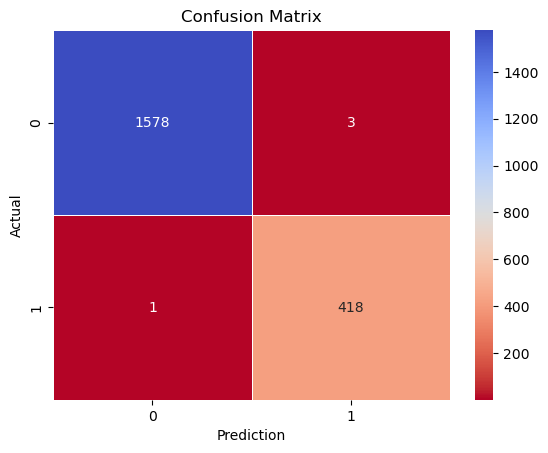

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
print(metrics.classification_report(y_test,rf.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')

Data diatas adalah hasil **evaluasi klasifikasi** menggunakan metrik precision, recall, dan f1-score, serta beberapa metrik tambahan seperti support dan akurasi. Berikut adalah interpretasi dari data tersebut:

- **Precision**: Precision mengukur proporsi dari hasil positif yang benar dari semua hasil yang diprediksi positif oleh model. Untuk kelas 0 (nasabah tidak keluar), precision adalah 1.00, yang berarti 100% dari hasil yang diprediksi sebagai kelas 0 (nasabah tidak keluar) adalah benar-benar kelas 0. Sedangkan untuk kelas 1 (nasabah keluar), precision adalah 0.99, yang berarti hampir semua dari hasil yang diprediksi sebagai kelas 1(nasabah keluar) adalah benar-benar kelas 1.

- **Recall**: Recall (juga dikenal sebagai sensitivity) mengukur proporsi dari semua kasus positif yang berhasil diidentifikasi oleh model. Untuk kelas 0, recall adalah 1.00, yang berarti seluruh kasus kelas 0 berhasil diidentifikasi dengan benar oleh model. Demikian juga untuk kelas 1, recall adalah 1.00, yang berarti semua kasus kelas 1 berhasil diidentifikasi dengan benar oleh model.

- **F1-score**: F1-score adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya. Untuk kelas 0 dan kelas 1, kedua-duanya memiliki F1-score sebesar 1.00.

- **Support**: Support adalah jumlah masing-masing kelas dalam data yang dievaluasi. Dalam kasus ini, terdapat 1581 sampel untuk kelas 0 dan 419 sampel untuk kelas 1.

- **Accuracy**: Akurasi adalah proporsi dari semua prediksi yang benar yang dilakukan oleh model. Dalam kasus ini, akurasi adalah 1.00, yang berarti semua prediksi yang dilakukan oleh model adalah benar.

**Dari data ini, kita dapat menyimpulkan bahwa model memiliki kinerja yang sangat baik dan  mampu membuat prediksi yang sangat baik.**

Dari confusion matrix diatas, kita memiliki informasi berikut:
* True Positive (TP) adalah 418, yang merupakan jumlah nasabah yang diprediksi memiliki keluar dan memang keluar.
* True Negative (TN) adalah 1578, yang merupakan jumlah nasabah yang diprediksi tidak keluar dan memang tidak keluar.
* False Positive (FP) adalah 3, yang merupakan jumlah nasabah yang diprediksi keluar, tetapi sebenarnya tidak keluar.
* False Negative (FN) adalah 1, yang merupakan jumlah nasabah yang diprediksi tidak keluar, tetapi sebenarnya keluar.

Dari hasil diatas dapat dilihat keakuratan model dalam memprediksi apakah nasabah keluar atau tidak. Perlu diperhatikan bahwa False Positive dan False Negative memiliki implikasi yang berbeda-beda tergantung pada konteks aplikasi. Oleh karena itu, dalam mengevaluasi kinerja model, penting untuk mempertimbangkan metrik lain seperti precision, recall, dan F1-score.

Observasi :
- sebanyak 3 diprediksi keluar tapi sebenarnya tidak keluar
- sebanyak 1 diprediksi tidak keluar tapi sebenarnya keluar <br>

dengan kata lain :
- true positif atau berhasil memprediksi keluar = 418 
- true negatif atau berhasil memprediksi tidak keluar = 1578 
- false positif atau keluar yg tidak berhasil diprediksi = 3 
- false negatif atau tidak keluar yg tidak berhasil diprediksi = 1 

In [45]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest on test data: ', round(gini_value*100, 2), '%')

AUC for Random Forest on test data:  99.95 %
Gini for Random Forest on test data:  99.9 %


Data yang diberikan memberikan metrik evaluasi dari model Random Forest pada data uji:

1. **AUC (Area Under the Curve)**: AUC adalah ukuran yang menunjukkan seberapa baik model dapat memisahkan antara dua kelas. Dalam konteks klasifikasi biner, AUC mengukur area di bawah kurva Receiver Operating Characteristic (ROC). Nilai AUC yang diberikan adalah 99.98%. Semakin tinggi nilai AUC, semakin baik model dalam memisahkan antara kelas positif dan negatif. Dalam hal ini, AUC sebesar 99.98% menunjukkan bahwa model Random Forest memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif.

2. **Gini**: Gini coefficient adalah metrik lain yang digunakan untuk mengukur ketidaksempurnaan pembagian (impurity) pada pohon keputusan atau model pemisah. Nilai Gini yang diberikan adalah 99.96%. Semakin tinggi nilai Gini, semakin baik model dalam memisahkan antara kelas. Dalam konteks ini, nilai Gini 99.96% menunjukkan bahwa model Random Forest memiliki kemampuan yang sangat baik dalam memisahkan antara kelas.

Secara keseluruhan, interpretasi dari data tersebut adalah bahwa model Random Forest memiliki kinerja yang baik dalam memisahkan antara kelas positif dan negatif pada data uji, dengan nilai AUC dan Gini yang menunjukkan kemampuan pemisahan yang layak.

### Intrepretable

In [46]:
!pip install dalex

In [47]:
import dalex as dx

In [48]:
## initiate explainer for Random Forest model
rf_explainer = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8000 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8000 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x0000003E1F3CCCC0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.202, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.38, mean = 0.000409, max = 0.41
  -> model_info        : package sklearn

A new explainer has been created!


In [49]:
rf_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|███████████████| 8/8 [00:02<00:00,  3.11it/s]


In [50]:
# visualize permutation feature importance for ridge regression
rf_explainer.model_parts().plot()

## 6. Model Evaluation and Conclusion


#### Hasil dari analisa ROC_AUC yang dilakukan:
1. Random Forest 99.92%
2. Decision Tree Classifier 99.29%
3. Gaussian NB 80.76% 
4. SVM 79.28%
5. KNN 69,44%
6. Logistic Regression 30.19%
5. Dari beberapa feature yang ditetapkan, 'Complain' merupakan faktor yang dominan/kuat dalam mempengaruhi hasil.

** Hasil terbaik diperoleh dari model Random Forest dengan 99.92%

## 7. Insight and Recommendation

#### Insight:
1. Pembuatan model memperkuat kesimpulan awal hasil dari EDA yaitu dari 2038 customer yang keluar, hampir seluruhnya mengajukan complain, sebanyak 2034. 
2. Model memiliki keberhasilan amat tinggi/baik yaitu sebesar 99.85% dalam memprediksi customer keluar.
3. Faktor utama yang mengakibatkan kemungkinan customer keluar adalah 'Complain'.
4. Pada EDA diketahui bahwa hampir 60% customer keluar adalah Female, sebanyak 1142 orang.
5. Feature yang lain terlihat adalah 'Age', dimana hal ini dimungkinkan karena pelanggan yang berumur bisa saja meninggal atau memutuskan berhenti karena mobilitas yang semakin sulit untuk ke Bank.
6. Feature lain yang juga terlihat adalah 'Balance',  dimana alasan yang masuk akal bahwa pelanggan yang memiliki saldo yang sedikit akhirnya memutuskan berhenti.


#### Recommendation:
1. Memperkuat Sistem Complain – meningkatkan responsivitas dan efektifitas dalam menangani keluhan pelanggan serta memberikan solusi yang memuaskan. Melakukan evaluasi atas seluruh complain yang diajukan untuk dibuatkan kebijakan baru dalam rangka perbaikan.
2. Penyesuaian Layanan – mengadakan layanan dan strategi baru melalui segmentasi pelanggan berdasarkan karakteristik demografis termasuk usia dan jenis kelamin.
3. Analisis Pelanggan yang Rentan Berhenti – melakukan Analisa lebih dalam mengenai feature ‘Age’ dan ‘Balance’, mempertimbangkan kemungkinan untuk membuat layanan baru yang bisa mengurangi pelanggan berhenti dari feature ini.
4. Strategi Layanan Terpersonalisasi – mengembangkan strategi untuk mempertahankan pelanggan terpersonalisasi, dengan penawaran khusus, loyality reward maupun layanan tambahan lain yang disesuaikan dengan preferensi individu pelanggan. Tujuannya adalah menambah keterikatan pelanggan terhadap Bank.
5. Monitoring dan Evaluasi Berkelanjutan – melakukan monitoring dan evaluasi secara berkala terhadap efektivitas strategi retensi yang diimplementasikan. Dengan melakukan evaluasi berkelanjutan, Bank dapat mengidentifikasi strategi yang efektif dan melakukan penyesuaian yang diperlukan sesuai dengan perubahan dalam perilaku pelanggan atau kondisi pasar.
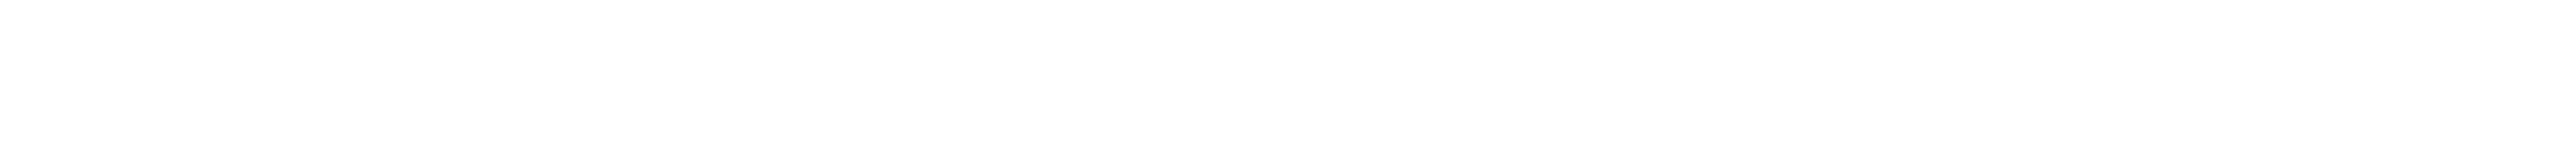


